### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv("prostate.data", sep="\t")
df = df.iloc[:, 1:-1]
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

- figsize = (7.10, 6.70) : sets the default size of the figure in inches
- n_vars = df.shape[1] : gets the number of columns in the dataframe
- fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) : creates a square grid of n_vars × n_vars subplots and returns the figure and axes.
- plt.subplots_adjust(wspace=0.10, hspace=0.10, ...) : controls the horizontal and vertical spacing between subplots
- axij = ax[i][j] : selects the individual subplot at row i, column j.
- i_name = df.columns[i], j_name = df.columns[j] : retrieve the names of the two variables being compared in this subplot.
- axij.set_xticks([]), axij.set_yticks([]) : removes tick marks on both axes to keep the plot clean.
- axij.margins(0.1) : adds 10% padding around the data so points are not clipped at the edges.
- if i != j: axij.scatter(...) : for off-diagonal cells, draws a scatter plot between variables i and j.
- else: axij.text(...) : on the diagonal (i == j), writes the variable name as centered text instead of a plot.

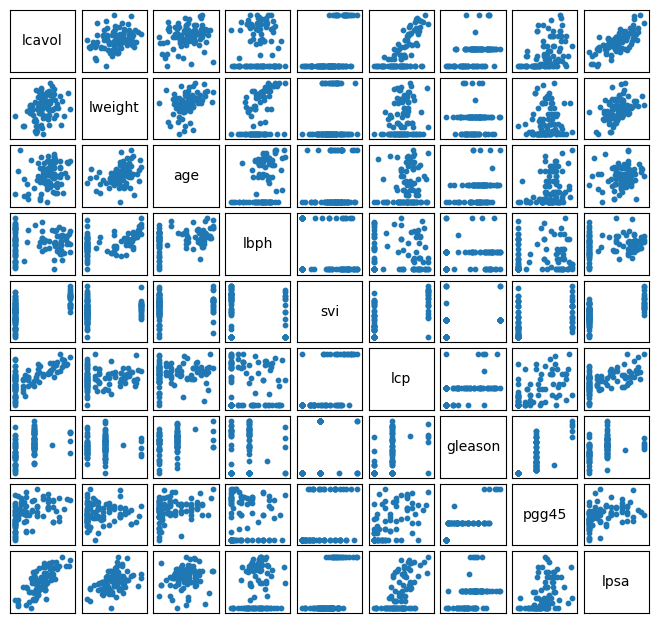

In [38]:
import matplotlib.pyplot as plt

def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                          horizontalalignment='center',
                          verticalalignment='center',
                          transform=axij.transAxes)
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

lpsa and lcp appear most correlated with lcavol: their scatter plots show a clear positive linear trend.

Regarding data types:
- lpsa, lweight, age, lbph, lcp, pgg45 are continuous variables.
- svi is a binary variable, visible as two horizontal clusters in scatter plots.
- gleason is a discrete variable with 4 possible integer values (6, 7, 8, 9), visible as four distinct horizontal bands.

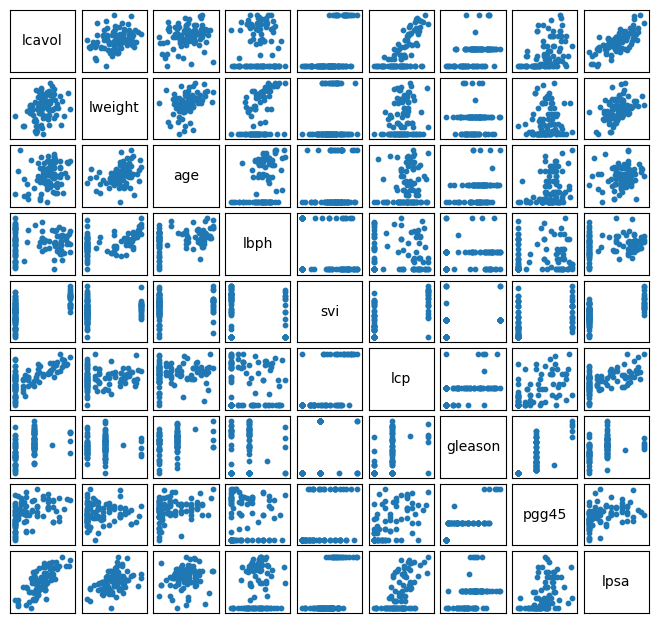

In [21]:
fig, ax = pairplot(df)
plt.show()

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

The Pearson correlation coefficient between two vectors $x$ and $y$ of length $n$ is:

$$r(x, y) = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Our function returns a **single scalar** for two input vectors, while `df.corr()` computes and returns the full **n×n correlation matrix** (as a DataFrame) for all pairs of columns at once.

C:\Users\leojj\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


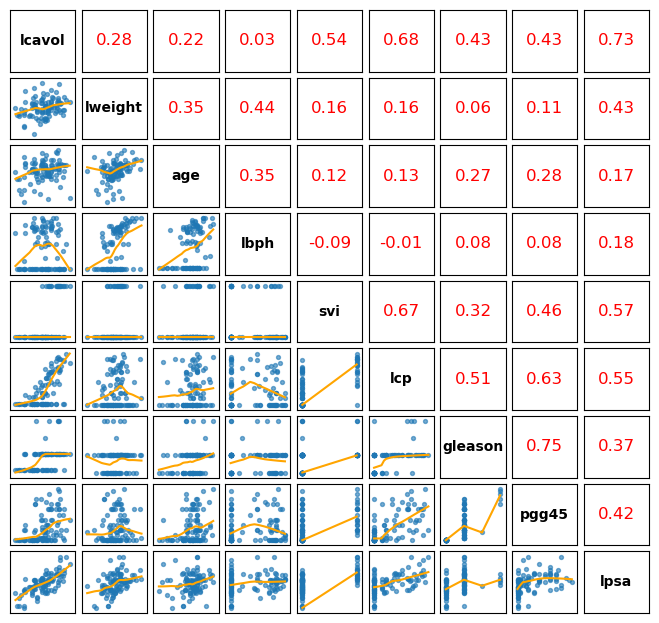

In [22]:
import numpy as np
import statsmodels.api as sm

def pearson_r(x, y):
    xc = x - x.mean()
    yc = y - y.mean()
    return (xc * yc).sum() / np.sqrt((xc**2).sum() * (yc**2).sum())

def pairplot_v2(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    lowess_fn = sm.nonparametric.lowess
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            col_i = df.columns[i]
            col_j = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i == j:
                axij.text(0.5, 0.5, col_i, fontsize=10, fontweight='bold',
                          ha='center', va='center', transform=axij.transAxes)
            elif i < j:
                r = pearson_r(df[col_i], df[col_j])
                axij.text(0.5, 0.5, f"{r:.2f}", fontsize=12, color='red',
                          ha='center', va='center', transform=axij.transAxes)
            else:
                axij.scatter(df[col_j], df[col_i], s=8, alpha=0.6)
                trend = lowess_fn(df[col_i], df[col_j], frac=0.6)
                axij.plot(trend[:, 0], trend[:, 1], color='orange', lw=1.5)
    return fig, ax

fig, ax = pairplot_v2(df)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

In [39]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

The multiple linear regression model is:

$lcavol = \beta_0 + \beta_1 \text{lpsa} + \beta_2 \text{lweight} + \beta_3 \text{age} + \beta_4 \text{lbph} + \beta_5 \text{lcp} + \beta_6 \text{pgg45} + \beta_7 \mathbb{1}_{(\text{svi}=1)} + \sum_{k \in \{7,8,9\}} \gamma_k \mathbb{1}_{(\text{gleason}=k)} + \epsilon$

- $\beta_0$: intercept, the predicted value of lcavol when all predictors are zero.
- $\beta_1, \dots, \beta_6$: slopes for the continuous predictors — they represent the change in lcavol for a one-unit increase in each variable, holding others constant.
- $\beta_7$: the difference in lcavol between a patient with svi = 1 and one with svi = 0.
- $\gamma_k$: the difference in lcavol between a patient with Gleason score $k$ and the reference score of 6.
- $\varepsilon \sim \mathcal{N}(0, \sigma^2)$: random error term assumed to be normally distributed.

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

In [40]:
df_enc = pd.get_dummies(df, dtype=np.float64)
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
df_enc['intercept'] = 1
X = df_enc.drop(columns=['lcavol'])
y = df['lcavol']

- dtype=np.float64: by default, pd.get_dummies creates boolean columns. Setting dtype=np.float64 forces the values to 0.0 and 1.0, which is required for matrix computations in the regression.

- Dropping one column per categorical variable: for svi, the sum svi_0 + svi_1 = 1 for every row, which is exactly equal to the intercept column. This creates perfect multicollinearity, making the design matrix $X^TX$ non-invertible. Dropping one dummy per category removes this redundancy without losing information. The same logic applies to gleason_6.

- Adding a column of ones: statsmodels does not add an intercept automatically. The intercept $\beta_0$ is estimated by including a column of ones in $X$, since $\hat{y} = X\hat{\beta}$ and the ones column allows the constant term to be fitted.

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [41]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        04:41:33   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- svi_1 coefficient: it represents the average change in lcavol for a patient with seminal vesicle invasion compared to one without, keeping all other variables fixed.
- gleason_7, gleason_8, gleason_9 coefficients: each measures the average difference in lcavol compared to the reference category.

Without one-hot encoding, gleason would be treated as a numeric variable. The model would assume a constant linear effect for each unit increase in the score, which is not medically justified since these are categories, not ordered quantities.

Overall, lpsa and lcp have the largest and most significant positive effects, confirming their strong association with tumor volume. lweight, svi and gleason are not statistically significant. The R² ~= 0.686, meaning the model explains about 69% of the variance in lcavol.

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [42]:
ci = results.conf_int(alpha=0.05)
ci.columns = ['Lower 95%', 'Upper 95%']
ci['Significant (0 excluded)'] = ~((ci['Lower 95%'] < 0) & (ci['Upper 95%'] > 0))
ci

,Lower 95%,Upper 95%,Significant (0 excluded)
lweight,-0.431600,0.409107,False
age,0.002436,0.047129,True
lbph,-0.219914,0.011515,False
lcp,0.233639,0.571880,True
pgg45,-0.018469,-0.000419,True
lpsa,0.370474,0.728673,True
svi_1,-0.730029,0.289190,False
gleason_7,-0.116263,0.739616,False
gleason_8,-2.219087,0.797911,False
gleason_9,-0.179004,1.759273,False


A coefficient is statistically significant at the 5% level if and only if its 95% confidence interval does not contain 0. This is consistent with the p-values from (c): lpsa, lcp, age, and pgg45 have intervals that exclude 0, while lweight, lbph, svi_1, and the Gleason dummies all include 0, confirming they are not significant.

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [43]:
print("p-value for lpsa:", results.pvalues['lpsa'])
print("95% CI for lpsa:", results.conf_int().loc['lpsa'].values)

p-value for lpsa: 2.9392406466908132e-08
95% CI for lpsa: [0.37047364 0.72867256]


The p-value for lpsa is essentially 0, which means we strongly reject the null hypothesis $H_0: \beta_{\texttt{lpsa}} = 0$. Its 95% confidence interval is entirely positive and well away from 0. Both results agree: lpsa has a highly significant positive effect on lcavol. A higher PSA level is strongly associated with a larger tumor volume.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [44]:
from scipy.stats import t as t_dist

def ols_manual(X_df, y_s):
    X_arr = np.asarray(X_df, dtype=float)
    y_arr = np.asarray(y_s, dtype=float)
    n, p = X_arr.shape
    XtX = X_arr.T @ X_arr
    Xty = X_arr.T @ y_arr
    beta = np.linalg.solve(XtX, Xty)
    residuals = y_arr - X_arr @ beta
    sigma2 = (residuals ** 2).sum() / (n - p)
    se = np.sqrt(sigma2 * np.diag(np.linalg.inv(XtX)))
    t_vals = beta / se
    pvals = 2 * t_dist.sf(np.abs(t_vals), df=n - p)
    return pd.Series(beta, index=X_df.columns), pd.Series(pvals, index=X_df.columns)

betas_manual, pvals_manual = ols_manual(X, y)
pd.DataFrame({
    'Manual beta': betas_manual,
    'statsmodels beta': results.params,
    'Manual p-value': pvals_manual,
    'statsmodels p-value': results.pvalues
})

,Manual beta,statsmodels beta,Manual p-value,statsmodels p-value
lweight,-0.011246,-0.011246,9.577075e-01,9.577075e-01
age,0.024782,0.024782,3.014993e-02,3.014993e-02
lbph,-0.104200,-0.104200,7.695609e-02,7.695609e-02
lcp,0.402760,0.402760,8.577858e-06,8.577858e-06
pgg45,-0.009444,-0.009444,4.047741e-02,4.047741e-02
lpsa,0.549573,0.549573,2.939241e-08,2.939241e-08
svi_1,-0.220419,-0.220419,3.922717e-01,3.922717e-01
gleason_7,0.311676,0.311676,1.512950e-01,1.512950e-01
gleason_8,-0.710588,-0.710588,3.516744e-01,3.516744e-01
gleason_9,0.790135,0.790135,1.087313e-01,1.087313e-01


**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

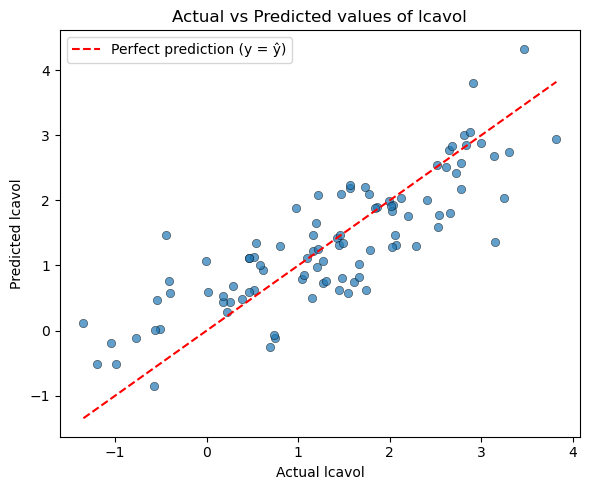

In [45]:
y_hat = results.get_prediction(X).predicted_mean

diag = [y.min(), y.max()]
plt.figure(figsize=(6, 5))
plt.scatter(y, y_hat, alpha=0.7, edgecolors='k', linewidths=0.4)
plt.plot(diag, diag, 'r--', label='Perfect prediction (y = ŷ)')
plt.xlabel('Actual lcavol')
plt.ylabel('Predicted lcavol')
plt.title('Actual vs Predicted values of lcavol')
plt.legend()
plt.tight_layout()
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

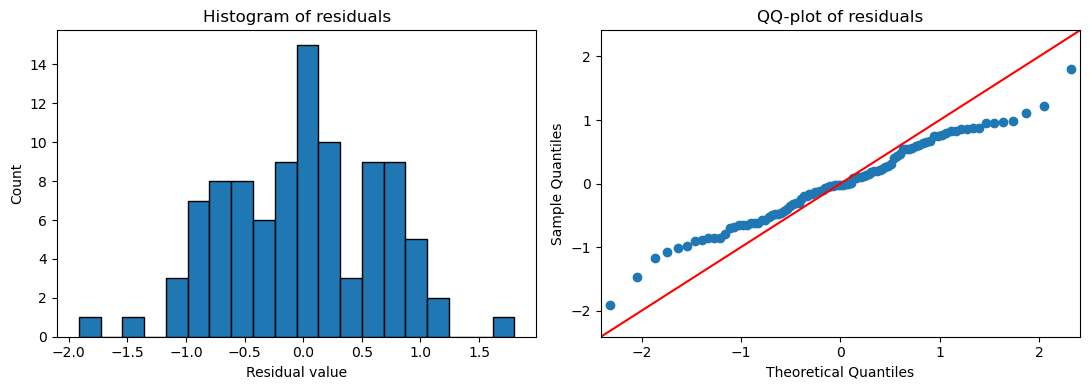

RSS = 41.8141


In [46]:
residuals = results.resid

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

axes[0].hist(residuals, bins=20, edgecolor='black')
axes[0].set_xlabel('Residual value')
axes[0].set_ylabel('Count')
axes[0].set_title('Histogram of residuals')

sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title('QQ-plot of residuals')

plt.tight_layout()
plt.show()

rss = (residuals ** 2).sum()
print(f"RSS = {rss:.4f}")

The histogram is roughly bell-shaped and centered near 0, suggesting normality. In the QQ-plot, the points follow the 45° reference line closely, with only slight deviations in the tails. We can reasonably conclude that the residuals are approximately normally distributed, which validates the OLS assumptions.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

Removing lpsa and lcp, the two most significant predictors, causes a large drop in R², meaning the model explains much less of the variance in lcavol. The RSS increases substantially. Other variables that were previously non-significant may become relatively more important to compensate, but the model's predictive accuracy will be noticeably worse.

In [47]:
X_reduced = X.drop(columns=['lpsa', 'lcp'])
results_reduced = sm.OLS(y, X_reduced).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        04:45:57   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [48]:
import itertools

predictors = ['lpsa', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

col_map = {
    'lpsa':    ['lpsa'],
    'lweight': ['lweight'],
    'age':     ['age'],
    'lbph':    ['lbph'],
    'svi':     ['svi_1'],
    'lcp':     ['lcp'],
    'gleason': ['gleason_7', 'gleason_8', 'gleason_9'],
    'pgg45':   ['pgg45']
}

def get_cols(subset):
    return ['intercept'] + [c for p in subset for c in col_map[p]]

def fit_rss(subset, X, y):
    return sm.OLS(y, X[get_cols(subset)]).fit().ssr

best_rss_k2, best_subset_k2 = min(
    ((fit_rss(combo, X, y), combo) for combo in itertools.combinations(predictors, 2)),
    key=lambda x: x[0]
)
print(f"Best k=2 subset: {best_subset_k2}")
print(f"Minimum RSS:     {best_rss_k2:.4f}")

Best k=2 subset: ('lpsa', 'lcp')
Minimum RSS:     47.2781


k=0 | RSS=133.3590 | Predictors: (intercept only)
k=1 | RSS=61.4209 | Predictors: ['lpsa']
k=2 | RSS=47.2781 | Predictors: ['lpsa', 'lcp']
k=3 | RSS=46.2378 | Predictors: ['lpsa', 'age', 'lcp']
k=4 | RSS=44.8784 | Predictors: ['lpsa', 'age', 'lbph', 'lcp']
k=5 | RSS=43.6900 | Predictors: ['lpsa', 'age', 'lcp', 'gleason', 'pgg45']
k=6 | RSS=42.1739 | Predictors: ['lpsa', 'age', 'lbph', 'lcp', 'gleason', 'pgg45']
k=7 | RSS=41.8154 | Predictors: ['lpsa', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
k=8 | RSS=41.8141 | Predictors: ['lpsa', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']


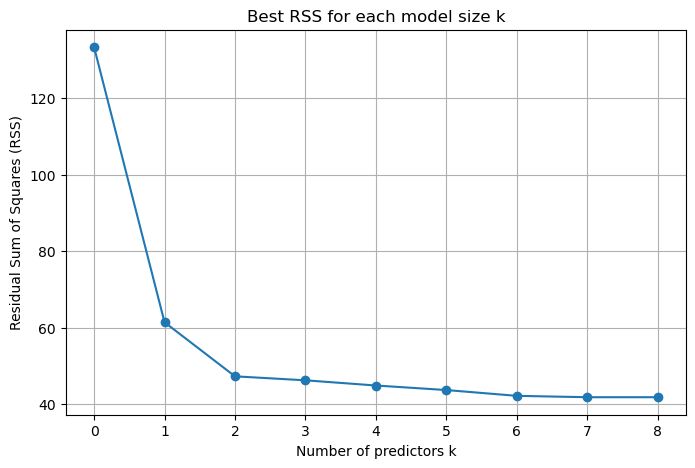

In [49]:
best_per_k = []
rss_per_k  = []

for k in range(9):
    if k == 0:
        rss = sm.OLS(y, X[['intercept']]).fit().ssr
        best_per_k.append([])
        rss_per_k.append(rss)
        print(f"k=0 | RSS={rss:.4f} | Predictors: (intercept only)")
    else:
        best_rss, best_combo = min(
            ((fit_rss(combo, X, y), combo) for combo in itertools.combinations(predictors, k)),
            key=lambda x: x[0]
        )
        best_per_k.append(list(best_combo))
        rss_per_k.append(best_rss)
        print(f"k={k} | RSS={best_rss:.4f} | Predictors: {list(best_combo)}")

plt.figure(figsize=(8, 5))
plt.plot(range(9), rss_per_k, marker='o')
plt.xlabel('Number of predictors k')
plt.ylabel('Residual Sum of Squares (RSS)')
plt.title('Best RSS for each model size k')
plt.grid(True)
plt.show()

Minimizing RSS is not a good criterion for selecting the optimal model size. As shown in the plot, the RSS always decreases (or stays the same) as $k$ increases. We would always end up selecting the largest model ($k=8$), regardless of whether the extra predictors are actually useful. This leads to overfitting: the model fits the training data noise rather than the true underlying pattern, and will generalize poorly to new observations.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

Split-validation divides the dataset into two parts: a training set used to fit the model parameters, and a test set used to measure how well the model generalizes to unseen data. Unlike RSS, the test error is not guaranteed to decrease as $k$ grows — it will increase when the model starts overfitting. This provides a more honest estimate of model performance and helps us choose the right model size.

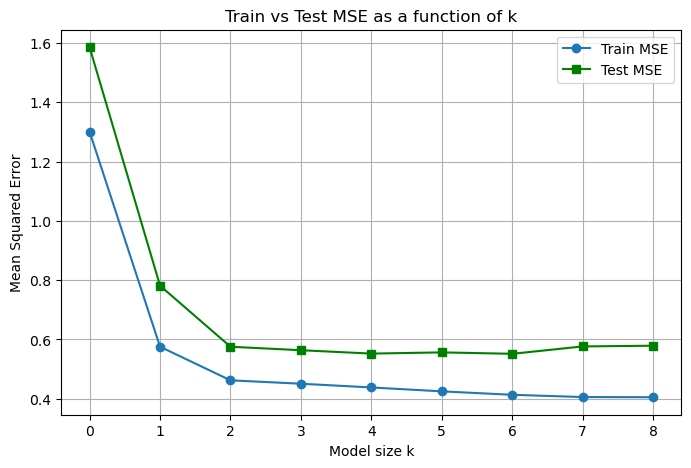

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_mse, test_mse = [], []

for k in range(9):
    cols = get_cols(best_per_k[k])
    m = sm.OLS(y_train, X_train[cols]).fit()
    train_mse.append(mean_squared_error(y_train, m.predict(X_train[cols])))
    test_mse.append(mean_squared_error(y_test, m.predict(X_test[cols])))

plt.figure(figsize=(8, 5))
plt.plot(range(9), train_mse, marker='o', label='Train MSE')
plt.plot(range(9), test_mse, marker='s', color='green', label='Test MSE')
plt.xlabel('Model size k')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE as a function of k')
plt.legend()
plt.grid(True)
plt.show()

The test MSE curve reaches its minimum around $k = 4$ or $k = 5$. We choose $k = 4$ as the best model because it achieves a low test error with fewer predictors, making it simpler and less likely to overfit. Below are the parameter estimates for this model trained on the full dataset:

In [52]:
best_k_split = int(np.argmin(test_mse))
print(f"Best k according to split-validation: {best_k_split}")
cols_best = get_cols(best_per_k[best_k_split])
final_model = sm.OLS(y, X[cols_best]).fit()
print(final_model.summary())

Best k according to split-validation: 6
                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     23.78
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           5.36e-19
Time:                        04:47:51   Log-Likelihood:                -97.241
No. Observations:                  97   AIC:                             212.5
Df Residuals:                      88   BIC:                             235.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

The main limitation of split-validation is its instability: with a small dataset like ours ($n=97$), the result depends heavily on which specific observations end up in the test set. Changing the random seed can give a completely different best $k$. The illustration below shows this.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.

Based on the 5-Fold Cross-Validation results, the test error stabilizes and reaches a minimum around $k = 4$ or $k = 5$. I recommend the model of size $k = 4$ or $k = 5$ as a good balance between accuracy and simplicity.

The selected predictors are consistently lpsa and lcp (the two most correlated with lcavol), along with a few others such as age and pgg45. These are also the variables with the lowest p-values in the full regression.

Adding more predictors beyond $k = 5$ does not meaningfully reduce the test error, and risks introducing overfitting. The final model with $k = 4$–$5$ predictors achieves a reasonable R² while remaining interpretable and generalizable to new patients.